In [ ]:
# Imports used in this notebook. This is Python 3 on Jupyter with matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt
import random
from itertools   import permutations, combinations
from functools   import lru_cache as cache
from collections import Counter
from statistics  import mean, median
import pandas as pd
import time

In [ ]:
def exhaustive_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key=tour_length)

# TO DO: Data types: City, Cities, Tour; Functions: alltours, tour_length

In [ ]:
def do(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the result, and print info."
    t0 = time.process_time()
    tour = algorithm(cities)
    t1 = time.process_time()
    assert Counter(tour) == Counter(cities) # Every city appears exactly once in tour
    plot_tour(tour)
    plt.text(x=461,y=295,s="City A",fontsize=10)
    plt.text(x=471,y=19,s="City B",fontsize=10)
    plt.text(x=631,y=636,s="City C",fontsize=10)
    plt.text(x=734,y=292,s="City D",fontsize=10)
    plt.text(x=74,y=79,s="City E",fontsize=10)
    print("{}: {} cities ⇒ tour length {:.0f} (in {:.3f} sec)".format(
          name(algorithm), len(tour), tour_length(tour), t1 - t0))
    
def name(algorithm): return algorithm.__name__.replace('_tsp', '')

In [ ]:
def tour_length(tour):
    """The total of distances between each pair of consecutive cities in the tour.
    This includes the last-to-first, distance(tour[-1], tour[0])"""
    return sum(distance(tour[i - 1], tour[i]) 
               for i in range(len(tour)))

City = complex

def distance(A, B): return abs(A - B)

def Cities(n, seed=391, width=999, height=666):
    "Make a set of n cities, sampled uniformly from a (width x height) rectangle."
    random.seed((n, seed))
    return frozenset(City(random.randint(1, width), random.randint(1, height))
                     for c in range(n))

In [ ]:
def plot_tour(tour, style='bo-'): 
    "Plot every city and link in the tour, and highlight start city."
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    plot_segment(tour + start, style) 
    
def plot_segment(segment, style='bo-'):
    "Plot every city and link in the segment."
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('on')
    
def X(city): "X coordinate."; return city.real
def Y(city): "Y coordinate."; return city.imag

In [ ]:
def join_endpoints(endpoints, A, B):
    "Join segments [...,A] + [B,...] into one segment. Maintain `endpoints`."
    Aseg, Bseg = endpoints[A], endpoints[B]
    if Aseg[-1] is not A: Aseg.reverse()
    if Bseg[0]  is not B: Bseg.reverse()
    Aseg += Bseg
    del endpoints[A], endpoints[B] 
    endpoints[Aseg[0]] = endpoints[Aseg[-1]] = Aseg
    return Aseg

In [ ]:
def improve_tour(tour):
    "Try to alter tour for the better by reversing segments."
    while True:
        improvements = {reverse_segment_if_improvement(tour, i, j)
                        for (i, j) in subsegments(len(tour))}
        if improvements == {None}:
            return tour

@cache()
def subsegments(N):
    "Return (i, j) pairs denoting tour[i:j] subsegments of a tour of length N."
    return [(i, i + length)
            for length in reversed(range(2, N))
            for i in reversed(range(N - length + 1))]

In [ ]:
def reverse_segment_if_improvement(tour, i, j):
    "If reversing tour[i:j] would make the tour shorter, then do it." 
    # Given tour [...A,B...C,D...], consider reversing B...C to get [...A,C...B,D...]
    A, B, C, D = tour[i-1], tour[i], tour[j-1], tour[j % len(tour)]
    # Are old links (AB + CD) longer than new ones (AC + BD)? If so, reverse segment.
    if distance(A, B) + distance(C, D) > distance(A, C) + distance(B, D):
        tour[i:j] = reversed(tour[i:j])
        return True

In [ ]:
def greedy_tsp(cities):
    """Go through links, shortest first. Use a link to join segments if possible."""
    endpoints = {C: [C] for C in cities} # A dict of {endpoint: segment}
    for (A, B) in shortest_links_first(cities):
        if A in endpoints and B in endpoints and endpoints[A] != endpoints[B]:
            new_segment = join_endpoints(endpoints, A, B)
            if len(new_segment) == len(cities):
                return new_segment
            
def improve_greedy_tsp(cities): return improve_tour(greedy_tsp(cities))
            
def shortest_links_first(cities):
    "Return all links between cities, sorted shortest first."
    return sorted(combinations(cities, 2), key=lambda link: distance(*link))
            
# TO DO: join_endpoints

In [ ]:
Cit=greedy_tsp(Cities(5))

Text(734, 292, 'City D')

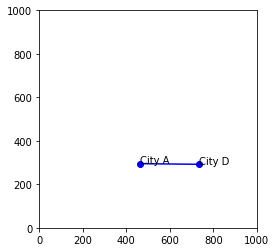

In [ ]:
plot_segment([(461+295j), (734+292j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)

Text(734, 292, 'City D')

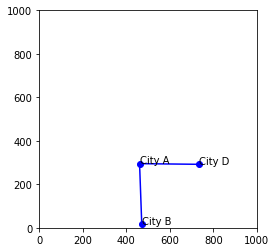

In [ ]:
plot_segment([(471+19j),(461+295j),(734+292j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=471,y=19,s="City B",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)


Text(631, 636, 'City C')

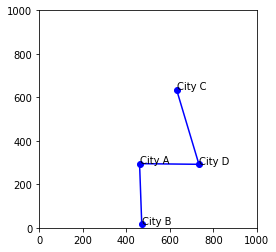

In [ ]:
plot_segment([(471+19j),(461+295j),(734+292j),(631+636j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=471,y=19,s="City B",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)
plt.text(x=631,y=636,s="City C",fontsize=10)

Text(74, 79, 'City E')

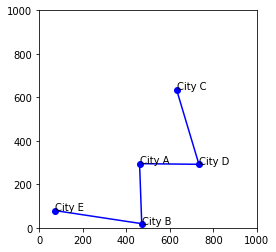

In [ ]:
plot_segment([(631+636j),(734+292j),(461+295j),(471+19j),(74+79j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=471,y=19,s="City B",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)
plt.text(x=631,y=636,s="City C",fontsize=10)
plt.text(x=74,y=79,s="City E",fontsize=10)

Text(74, 79, 'City E')

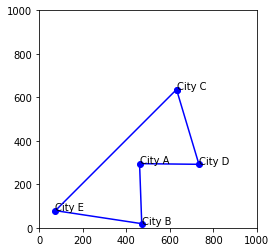

In [ ]:
plot_segment([(631+636j),(734+292j),(461+295j),(471+19j),(74+79j),(631+636j)])
plt.axis('scaled')
plt.axis([0, 1000, 0, 1000])
plt.text(x=461,y=295,s="City A",fontsize=10)
plt.text(x=471,y=19,s="City B",fontsize=10)
plt.text(x=734,y=292,s="City D",fontsize=10)
plt.text(x=631,y=636,s="City C",fontsize=10)
plt.text(x=74,y=79,s="City E",fontsize=10)

In [ ]:
df1=[]
df2=[]
df3=[]
df=[]
for i in range(100,1025,25):
  t0 = time.process_time()
  greedy_tsp(Cities(i))
  t1 = time.process_time()
  df1.append(i)
  df2.append(t1-t0)
  df3.append(tour_length(greedy_tsp(Cities(i))))
df=pd.DataFrame({'Πλήθος Πόλεων':df1,'Χρόνος Εκτέλεσης':df2,"Κόστος Διαδρομής":df3})

In [ ]:
df
#from google.colab import files
#df.to_csv('output.csv', encoding = 'utf-8-sig') 
#files.download('output.csv')

,Πλήθος Πόλεων,Χρόνος Εκτέλεσης,Κόστος Διαδρομής
0,100,0.007350,7148.987308
1,125,0.011628,8191.232220
2,150,0.016735,8987.879383
3,175,0.020955,9649.243637
4,200,0.028032,10461.202594
5,225,0.037092,11188.840094
6,250,0.042488,11457.923315
7,275,0.053127,11640.413512
8,300,0.073701,13237.449069
9,325,0.078934,12943.320938
